In [10]:
import pandas as pd
import numpy as np
from PIL import Image
from IPython.display import display
import os
import imageio
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms 
import albumentations as A
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
folders = ['dataA','dataB','dataC','dataD','dataE']
image_folder = 'CameraRGB'
mask_folder = 'CameraSeg'

In [3]:
data = []
base = '../input/lyft-udacity-challenge/'
for folder in folders:
    image_path = os.path.join(base,folder+"/"+folder, image_folder)
    mask_path = os.path.join(base,folder+"/"+folder, mask_folder)
    
    image_files = os.listdir(image_path)
    mask_files = os.listdir(mask_path)
    
    for image_file, mask_file in zip(image_files, mask_files):
        image_full_path = os.path.join(image_path, image_file)
        mask_full_path = os.path.join(mask_path, mask_file)
        
        data.append({'id': image_file.split('.')[0], 'imagepath': image_full_path, 'maskpath': mask_full_path})

df = pd.DataFrame(data)

In [4]:
class SDCDataSet(Dataset):
    def __init__(self,imgData):
        self.train = train
        self.imgData = imgData
        self.transform = A.Compose([
                            A.RandomCrop(width=256, height=256),
                            A.HorizontalFlip(p=0.2),
                            A.RandomBrightnessContrast(p=0.2),
                        ])
    def __len__(self):
        return len(self.imgData)
    def __getitem__(self,idx):
        img = imageio.v3.imread(self.imgData.iloc[idx].imagepath)
        mask = imageio.v3.imread(self.imgData.iloc[idx].maskpath,mode="L")
        transformed = self.transform(image=img, mask=mask)
        return transformed['image'],transformed['mask']  

In [5]:
train,test = train_test_split(df,test_size=0.2)

In [6]:
train_ds = SDCDataSet(train)
valid_ds = SDCDataSet(test)

In [7]:
len(valid_ds)

1000

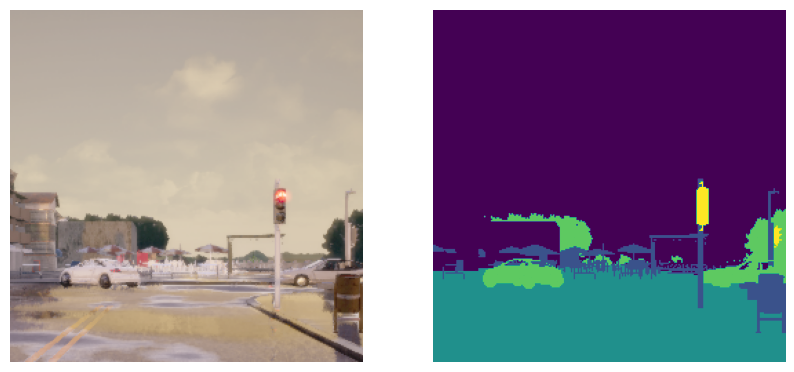

In [8]:

img,mask = train_ds[970]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
#plt.title(f'Image {i+1} - Subfolder: {subfolder}')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mask)  # Display mask in grayscale
#plt.title(f'Mask {i+1} - Subfolder: {subfolder}')
plt.axis('off')


plt.show()

In [ ]:
train_dl = DataLoader(train_ds,batch_size=8)
valid_dl = DataLoader(valid_ds,batch_size=8)

In [9]:
device = torch.device('cuda:0')


In [ ]:
model = 

In [ ]:
criterion = nn.CrossEntropyLoss()

# Define your optimizer
num_epochs = 10
optimizer = optim.Adam(model.parameters(), lr=0.001)
#scheduler = optim.lr_scheduler.OneCycleLR(optimizer,max_lr=0.001,epochs=num_epochs,steps_per_epoch=64)
num_epochs = 10
# Training loop
for epoch in range(num_epochs):
    # Training phase
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for inputs, labels in train_dl:
        optimizer.zero_grad()
        inputs=inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        #scheduler.step()
        running_loss += loss.item()
    avg_train_loss = running_loss / len(train_dl)

    # Validation phase
    model.eval()  # Set the model to evaluation mode
    running_val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in valid_dl:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    avg_val_loss = running_val_loss / len(valid_dl)
    val_accuracy = correct / total

    # Print average loss and accuracy for the epoch
    print(f"Epoch {epoch+1}: Train Loss = {avg_train_loss:.4f} | Val Loss = {avg_val_loss:.4f} | Val Accuracy = {val_accuracy:.2%}")